**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: Carlos Humberto Galvan Perales
*   MATRÍCULA: A01797969

En esta actividad trabajarás con el archivo `computer_prices.csv`, basado en un conjunto de datos sobre características técnicas y especificaciones de computadoras portátiles y de escritorio, disponible en Kaggle.

Los datos fueron recopilados para analizar el rendimiento y el precio de los dispositivos, e incluyen información sobre hardware, almacenamiento, conectividad y otras especificaciones técnicas. Los indicadores incluidos son:

* `device_type`: Tipo de dispositivo (ej. laptop, desktop)
* `brand`: Marca del dispositivo
* `model`: Modelo del dispositivo
* `release_year`: Año de lanzamiento del dispositivo
* `os`: Sistema operativo instalado
* `form_factor`: Factor de forma o diseño del dispositivo (ej. laptop, ultrabook, desktop tower)
* `cpu_brand`: Marca del procesador
* `cpu_tier`: Nivel o gama del procesador, ordinal del 1 al 6 según desempeño
* `cpu_cores`: Número de núcleos del procesador
* `cpu_threads`: Número de hilos de ejecución del procesador
* `gpu_brand`: Marca de la tarjeta gráfica
* `gpu_model`: Modelo específico de la tarjeta gráfica
* `gpu_tier`: Nivel o gama de la GPU, ordinal del 1 al 6 según desempeño
* `vram_gb`: Memoria de video de la GPU en gigabytes
* `ram_gb`: Memoria RAM del dispositivo en gigabytes
* `storage_type`: Tipo de almacenamiento (ej. HDD, SSD)
* `storage_gb`: Capacidad de almacenamiento en gigabytes
* `storage_drive_count`: Número de unidades de almacenamiento instaladas
* `display_type`: Tipo de pantalla (ej. IPS, TN, OLED)
* `charger_watts`: Potencia del cargador (en watts) para laptops
* `psu_watts`: Potencia de la fuente de poder (en watts) para desktops
* `wifi`: Estándar de conectividad Wi-Fi (ej. Wi-Fi 5, 6, 6E, 7)
* `bluetooth`: Versión de Bluetooth
* `weight_kg`: Peso del dispositivo en kilogramos
* `warranty_months`: Meses de garantía del dispositivo
* `price`: Precio del dispositivo. Es la variable de salida o *target*, es decir, la que se pretende predecir más adelante al construir el modelo.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.

In [43]:
# Importar las bibliotecas necesarias
# Manejo de datos
import pandas as pd
import numpy as np
from datetime import date

# Visualizacion
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# Estadistica y FE
from scipy.stats import probplot, norm
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders.binary import BinaryEncoder


1. Descarga el archivo: `computer_prices.csv` y guarda, en un dataframe (`compu_df`), todos sus registros.
* Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas de texto?
* Determina la cantidad de valores únicos por columna.
* Elimina las variables:
  * `model`: Debido a su altísima cardinalidad, lo que dificulta su uso en análisis y modelado.
  * `cpu_model`: Además de su elevada cardinalidad, su información ya está representada de manera implícita en otras variables como: `cpu_tier`, `cpu_cores` y `cpu_threads`

In [2]:
# Leer csv
compu_df = pd.read_csv("computer_prices.csv")

# Obtener el resumen de los tipos de datos
compu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   device_type          100000 non-null  object 
 1   brand                100000 non-null  object 
 2   model                100000 non-null  object 
 3   release_year         100000 non-null  int64  
 4   os                   100000 non-null  object 
 5   form_factor          100000 non-null  object 
 6   cpu_brand            100000 non-null  object 
 7   cpu_model            100000 non-null  object 
 8   cpu_tier             100000 non-null  int64  
 9   cpu_cores            100000 non-null  int64  
 10  cpu_threads          100000 non-null  int64  
 11  gpu_brand            100000 non-null  object 
 12  gpu_model            100000 non-null  object 
 13  gpu_tier             100000 non-null  int64  
 14  vram_gb              100000 non-null  int64  
 15  ram_gb            

In [3]:
# Cantidad de valores unicos por columna en orden ascendente
compu_df.nunique().sort_values(ascending=True)

device_type                2
cpu_brand                  3
os                         4
gpu_brand                  4
warranty_months            4
wifi                       4
storage_drive_count        4
storage_type               4
storage_gb                 5
bluetooth                  5
cpu_tier                   6
display_type               6
gpu_tier                   6
charger_watts              7
vram_gb                    8
release_year               8
psu_watts                  9
brand                     10
form_factor               10
cpu_cores                 12
ram_gb                    15
cpu_threads               25
weight_kg                 47
gpu_model                 49
price                   3366
cpu_model              26971
model                  99036
dtype: int64

In [4]:
# Eliminar las columnas model y cpu_model
try: # En caso de por error volver a correr la celda
    columns = ["model","cpu_model"]
    compu_df.drop(columns, axis=1, inplace=True)
    print(f"Columnas {columns} borradas por alta cardinalidad y redundancia de representacion de caracteristicas con otras columnas")
except:
    print("Columnas borradas anteriormente")

Columnas ['model', 'cpu_model'] borradas por alta cardinalidad y redundancia de representacion de caracteristicas con otras columnas


2. Antes de iniciar con el análisis univariado, verifica si hay valores duplicados y/o faltantes.
* Obtén las estadísticas descriptivas, separado las numéricas y las categóricas. De estas últimas incluye las tablas de frecuencia.
* Genera histogramas para las numéricas y diagramas de barras para las categóricas. Con alta cardinalidad, sólo incluye los 10 valores más frecuentes.

In [19]:
print(compu_df["bluetooth"].value_counts().sort_values(ascending=False))
print(compu_df["cpu_tier"].value_counts().sort_values(ascending=False))
print(compu_df["gpu_tier"].value_counts().sort_values(ascending=False))

bluetooth
5.2    28065
5.0    25980
5.1    21951
5.3    18065
4.2     5939
Name: count, dtype: int64
cpu_tier
3    25752
4    22209
2    21325
1    12967
5    12842
6     4905
Name: count, dtype: int64
gpu_tier
3    23144
2    21256
1    19259
4    19135
5    11844
6     5362
Name: count, dtype: int64


> Existen algunas variables con tipo de columna numerica, que realmente son variables categoricas ordinales, estas son:
> - `cpu_tier` : Clasificacion jerarquica (ordinal) de unidad central de procesamiento
> - `gpu_tier` : Clasificacion jerarquica (ordinal) de la unidad de procesamiento grafico (tarjeta grafica)
> - `bluetooth` : Variable jerarquica (ordinal) con la generacion/version del bluetooth

In [22]:
# Definimos las categorias ordenadas
bluetooth_order = ['4.2', '5.0', '5.1', '5.2', '5.3']
cpu_tier_order = [1, 2, 3, 4, 5, 6]
gpu_tier_order = [1, 2, 3, 4, 5, 6]

# Convertimos gpu_tier, cpu_tier y bluetooth a variable categorica ordinal
compu_df["bluetooth"] = pd.Categorical(compu_df["bluetooth"].astype(str), categories= bluetooth_order, ordered = True)
compu_df["cpu_tier"] = pd.Categorical(compu_df["cpu_tier"].astype(int), categories= cpu_tier_order, ordered = True)
compu_df["gpu_tier"] = pd.Categorical(compu_df["gpu_tier"].astype(int), categories=gpu_tier_order, ordered = True)

# Verificar correcta conversion
print(f"Bluetooth tipo de columna: {compu_df['bluetooth'].dtype}")
print(f"Cpu_tier tipo de columna: {compu_df['cpu_tier'].dtype}")
print(f"Gpu_tier tipo de columna: {compu_df['gpu_tier'].dtype}")

Bluetooth tipo de columna: category
Cpu_tier tipo de columna: category
Gpu_tier tipo de columna: category


In [24]:
# Contar cuántas columnas son numéricas y cuántas son de texto (reutilizando de la actividad 5)
num_cols = compu_df.select_dtypes(include=[np.number]).columns
cat_cols = compu_df.select_dtypes(include=["object", "category"]).columns

print(f"Variables numericas: {num_cols}")
print(f"Variables categoricas: {cat_cols}")

Variables numericas: Index(['release_year', 'cpu_cores', 'cpu_threads', 'vram_gb', 'ram_gb',
       'storage_gb', 'storage_drive_count', 'charger_watts', 'psu_watts',
       'weight_kg', 'warranty_months', 'price'],
      dtype='object')
Variables categoricas: Index(['device_type', 'brand', 'os', 'form_factor', 'cpu_brand', 'cpu_tier',
       'gpu_brand', 'gpu_model', 'gpu_tier', 'storage_type', 'display_type',
       'wifi', 'bluetooth'],
      dtype='object')


In [29]:
# Estadísticas descriptivas básicas
desc_num = compu_df[num_cols].describe().round(2).T

# Calcular sesgo y curtosis para cada variable numérica
desc_num['skew'] = compu_df[num_cols].skew().round(2)
desc_num['kurtosis'] = compu_df[num_cols].kurtosis().round(2)

print("Estadísticas descriptivas de variables numéricas (incluye sesgo y curtosis):")
display(desc_num)

Estadísticas descriptivas de variables numéricas (incluye sesgo y curtosis):


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
release_year,100000.0,2022.32,2.03,2018.00,2021.00,2023.00,2024.00,2025.00,-0.48,-0.72
cpu_cores,100000.0,10.52,5.04,4.00,6.00,8.00,14.00,28.00,1.09,1.01
cpu_threads,100000.0,19.37,9.72,4.00,12.00,16.00,24.00,56.00,1.13,1.30
vram_gb,100000.0,6.15,3.96,0.00,4.00,6.00,8.00,16.00,0.28,-0.35
ram_gb,100000.0,39.71,31.90,8.00,16.00,32.00,64.00,144.00,1.05,0.20
storage_gb,100000.0,903.94,774.24,256.00,512.00,512.00,1024.00,4096.00,2.30,6.27
storage_drive_count,100000.0,1.52,0.80,1.00,1.00,1.00,2.00,4.00,1.54,1.75
charger_watts,100000.0,61.38,62.80,0.00,0.00,65.00,90.00,240.00,0.86,0.24
psu_watts,100000.0,272.52,354.69,0.00,0.00,0.00,650.00,1200.00,0.77,-0.94
weight_kg,100000.0,4.29,3.81,0.92,1.50,2.00,7.00,16.00,1.18,0.36


In [32]:
compu_df[cat_cols].describe().T

,count,unique,top,freq
device_type,100000,2,Laptop,59844
brand,100000,10,Lenovo,15992
os,100000,4,Windows,71817
form_factor,100000,10,Mainstream,17819
cpu_brand,100000,3,Intel,52774
cpu_tier,100000,6,3,25752
gpu_brand,100000,4,NVIDIA,54712
gpu_model,100000,49,Apple Integrated,18922
gpu_tier,100000,6,3,23144
storage_type,100000,4,NVMe,45059


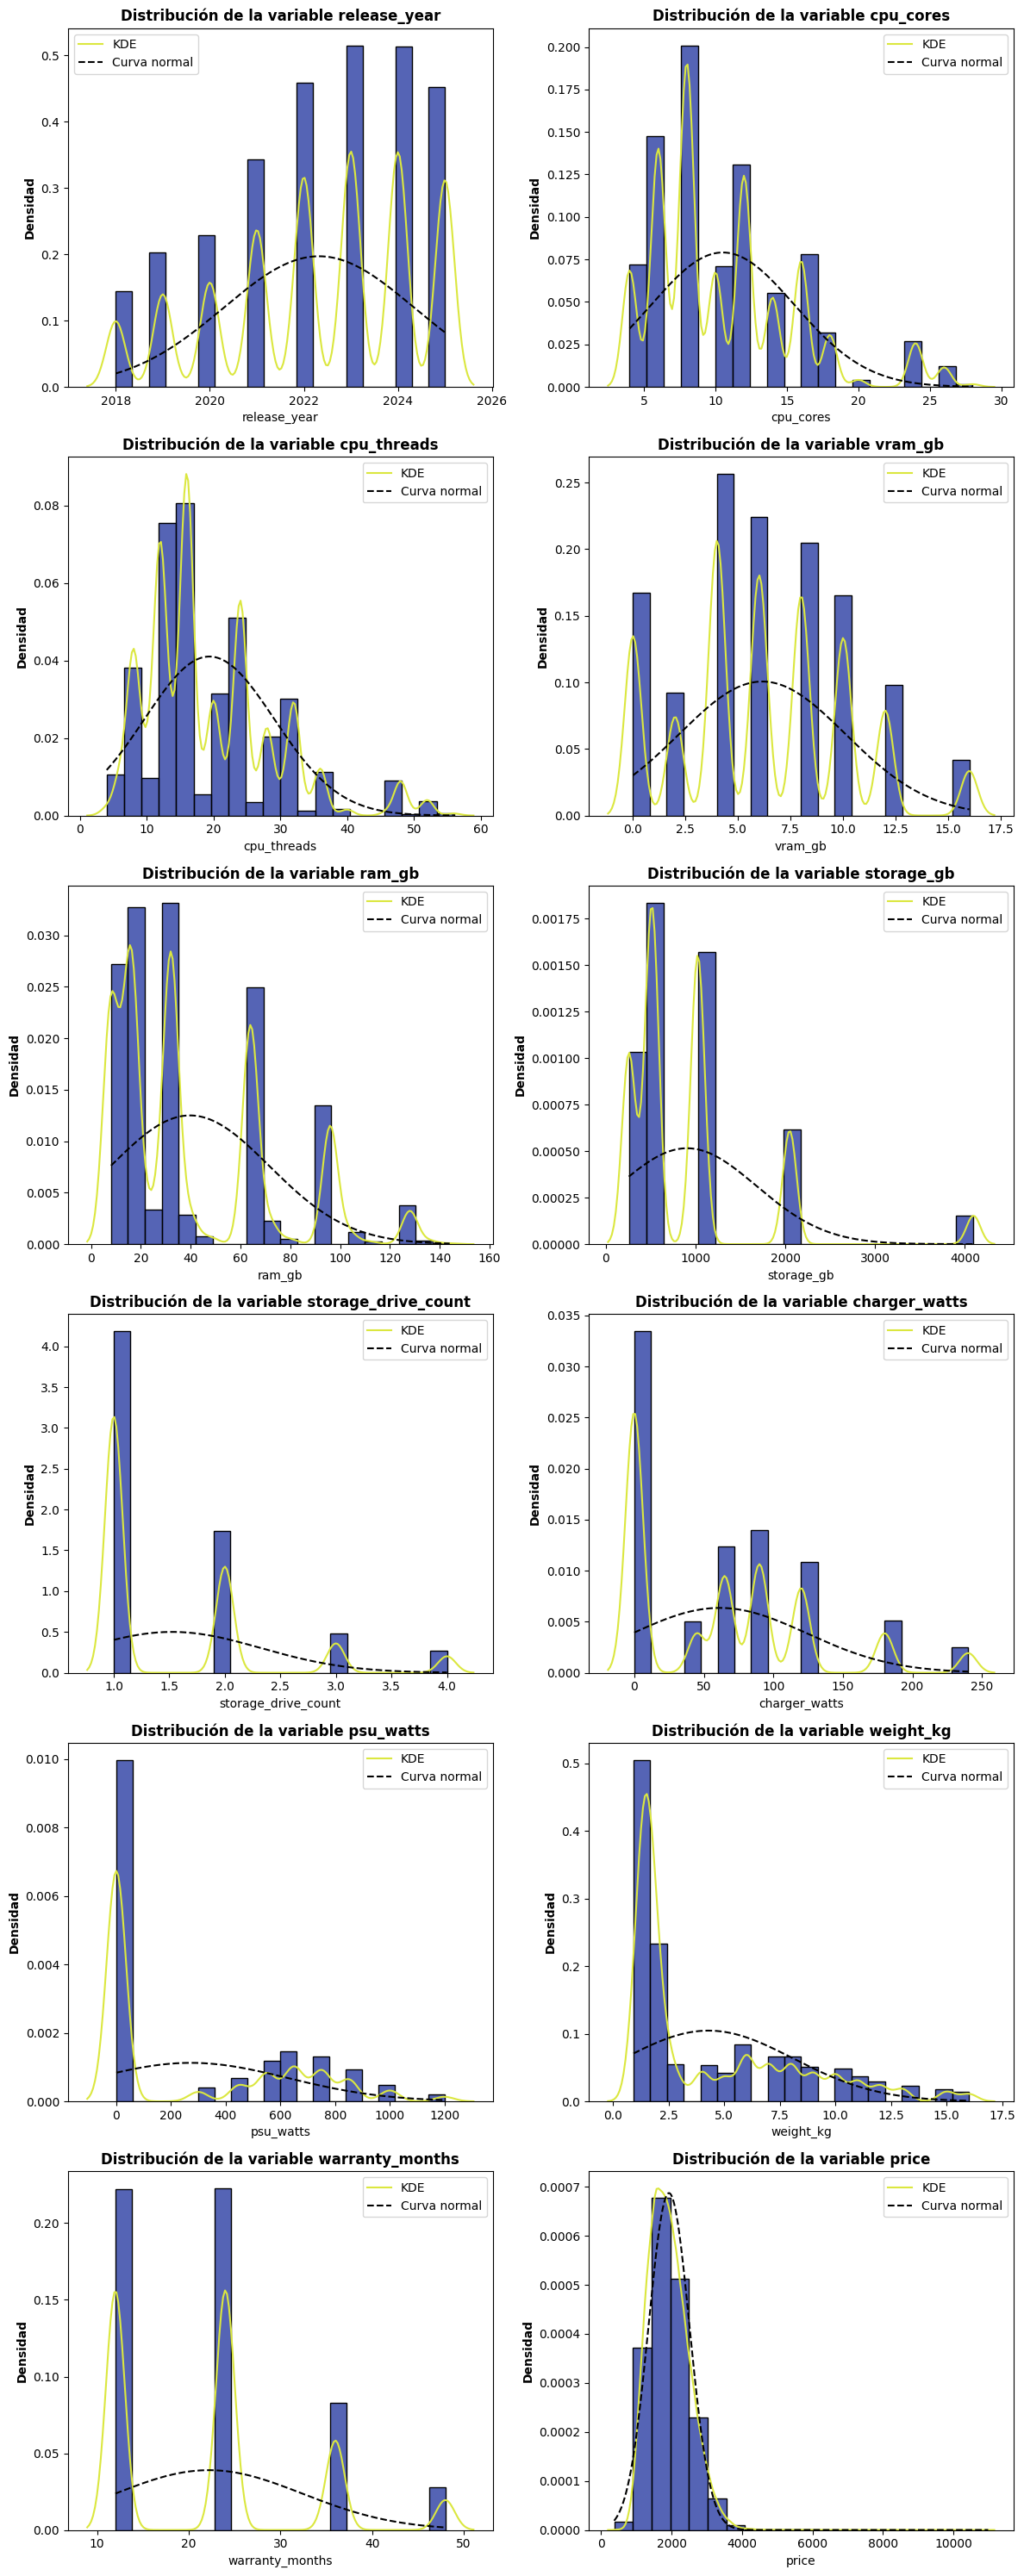

In [42]:
# Reutilizando de la actividad 5
fig_cols = 2
fig_rows = (len(num_cols) + fig_cols - 1) // fig_cols  # Calcula el número de filas necesarias
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(6 * fig_cols, 5 * fig_rows))
axes = axes.flatten()

for idx, col in enumerate(num_cols):
    ax = axes[idx]
    sns.histplot(
        compu_df[col],
        stat='density',
        bins=20,
        color='#1c309d',
        #label='Histograma',
        edgecolor='black',
        ax=ax
    )
    sns.kdeplot(
        compu_df[col],
        color='#dbe73f',
        label='KDE',
        ax=ax
    )
    x_vals = np.linspace(compu_df[col].min(), compu_df[col].max(), 1000)
    normal_ref = norm.pdf(x_vals, loc=compu_df[col].mean(), scale=compu_df[col].std())
    ax.plot(x_vals, normal_ref, color='black', linestyle='--', label='Curva normal')
    ax.set_title(f'Distribución de la variable {col}', fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Densidad', fontweight='bold')
    ax.legend()

# Eliminar ejes sin datos si num_cols no llena todas las subplots
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

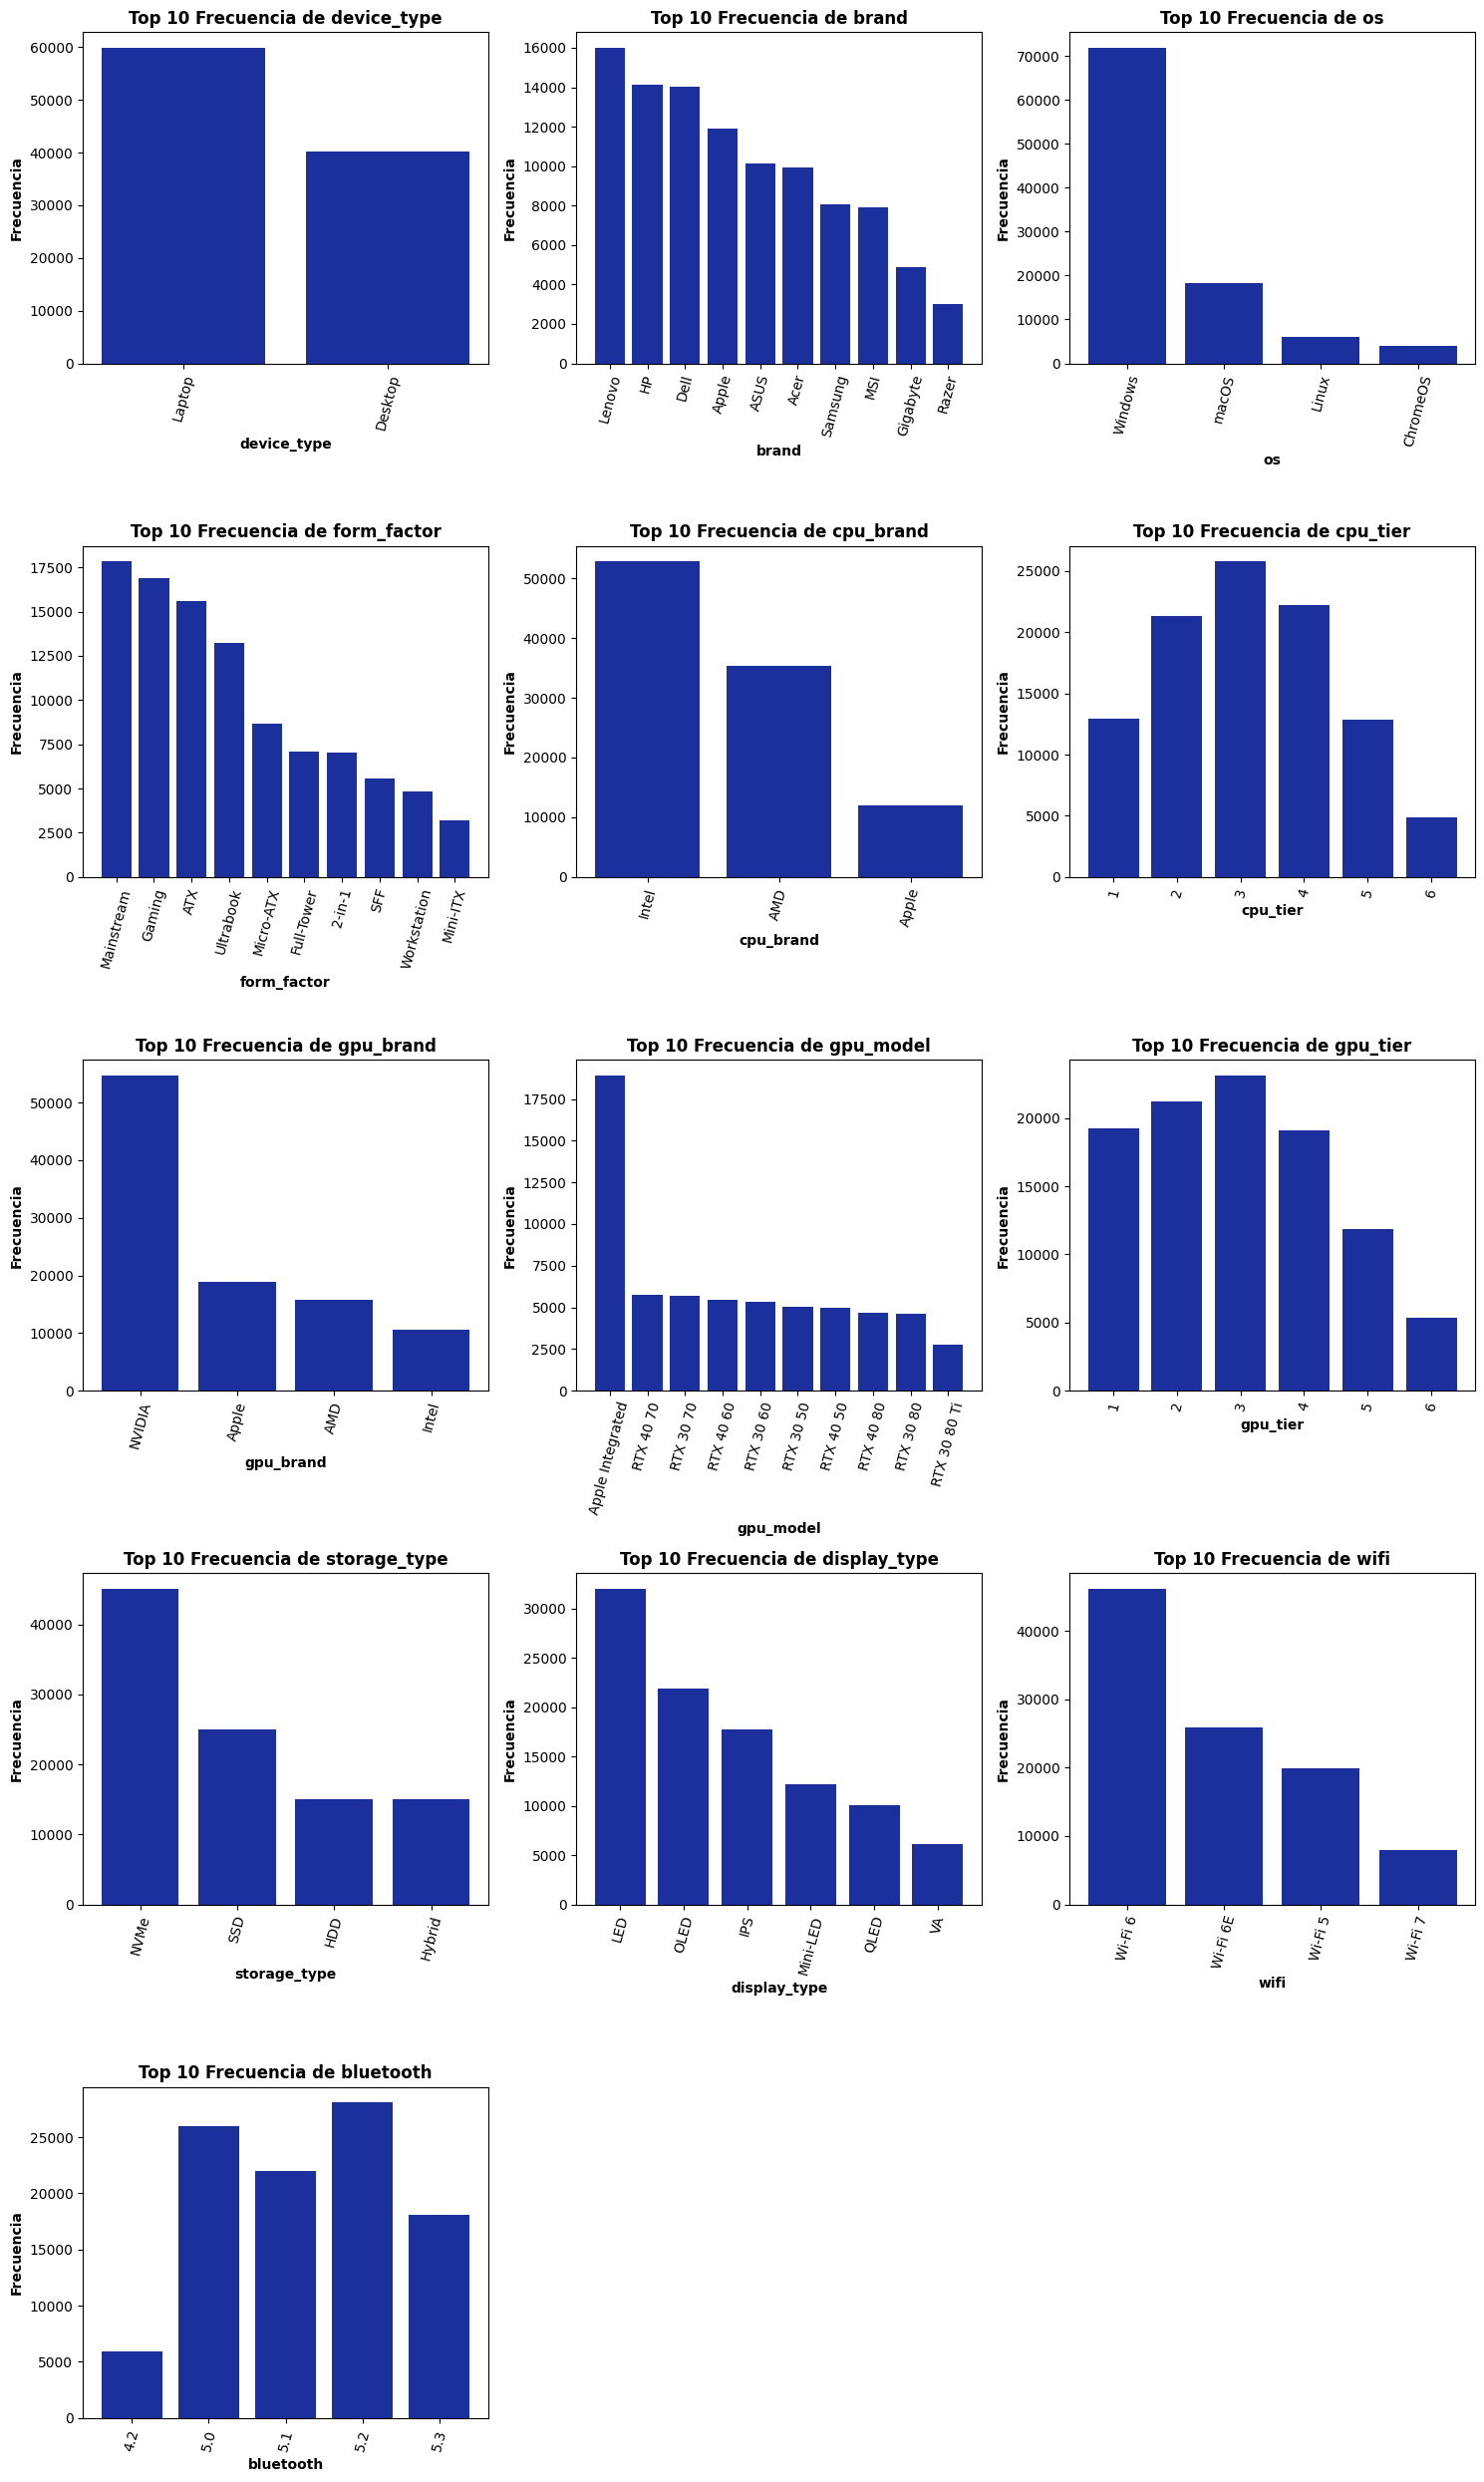

In [ ]:
# Reutilizando de la actividad 5
fig_cols = 3
fig_rows = (len(cat_cols) + fig_cols - 1) // fig_cols  # Calcula el número de filas necesarias
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(5 * fig_cols, 5 * fig_rows))
axes = axes.flatten()  # Para indexar fácilmente

for idx, col in enumerate(cat_cols):
    # Si la variable es de tipo category y es ordinal, mostrar en el orden de categorías
    if isinstance(compu_df[col].dtype, pd.CategoricalDtype) and compu_df[col].cat.ordered:
        categories = compu_df[col].cat.categories
        value_counts = compu_df[col].value_counts().reindex(categories, fill_value=0)
        # Solo mostrar top 10 si hay más de 10 categorías
        if len(value_counts) > 10:
            value_counts = value_counts[:10]
    else:
        value_counts = compu_df[col].value_counts().head(10)  # Solo el top 10
    axes[idx].bar(value_counts.index.astype(str), value_counts.values, color='#1c309d')
    axes[idx].set_title(f'Top 10 Frecuencia de {col}', fontweight='bold')
    axes[idx].set_xlabel(col, fontweight='bold')
    axes[idx].set_ylabel('Frecuencia', fontweight='bold')
    axes[idx].tick_params(axis='x', labelrotation=75)

# Eliminar ejes sin datos si cat_cols no llena todas las subplots
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

3. Dibuja un mapa de calor con la matriz de correlación para las variables numéricas del conjunto de datos.
* Identifica los pares de variables cuya correlación sea superior a 0.9 e imprímelos.
* Reflexiona sobre cuáles variables representan de manera general la capacidad del hardware y mantenlas; elimina las demás por aportar información redundante.
* Incluye una breve justificación de tus decisiones.

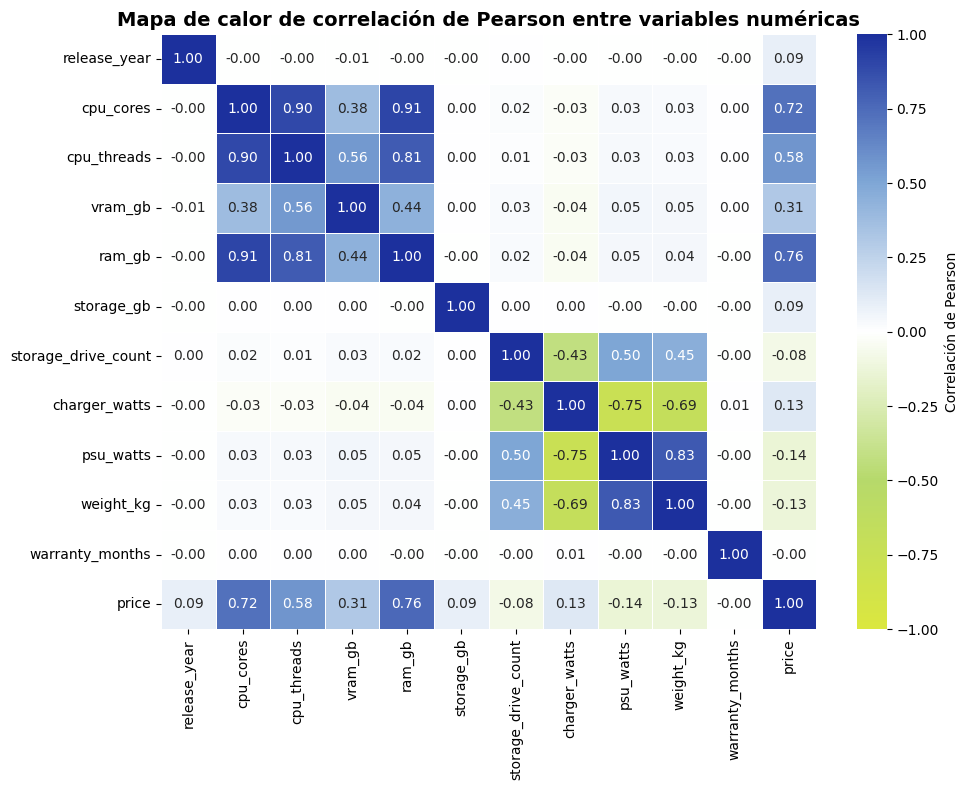

Pares de variables con correlación absoluta > 0.9:
cpu_cores / ram_gb: 0.907


In [48]:
# Reutilizando de la actividad 4
# Calcular la matriz de correlación de Pearson para las variables numéricas
corr_matrix = compu_df[num_cols].corr(method='pearson')

# Definir un colormap personalizado
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_corr",
    [
        "#dbe73f",   
        "#b6d96b",  
        "#ffffff",
        "#7fa7d6", 
        "#1c309d" 
    ]
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,
    vmin=-1, vmax=1,
    linewidths=0.5,
    cbar_kws={'label': 'Correlación de Pearson'}
)
plt.title('Mapa de calor de correlación de Pearson entre variables numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Extraer los pares de variables cuya correlación sea superior a 0.9 (y diferente de 1)
# Lista para almacenar los pares de variables altamente correlacionadas
pares_corr_altas = []

# Definir el umbral para considerar una correlación "alta"
umbral = 0.9

# Recorrer la matriz de correlación, ignorando los valores diagonales
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):  # Solo recorre los pares superiores
        corr_val = corr_matrix.iloc[i, j]
        # Verificar si la correlación supera el umbral
        if abs(corr_val) > umbral:
            pares_corr_altas.append(
                (corr_matrix.index[i], corr_matrix.columns[j], corr_val)
            )

print("Pares de variables con correlación absoluta > 0.9:")
for var1, var2, corr_val in pares_corr_altas:
    # Extrae el nombre del par de variables y su correlacion
    print(f"{var1} / {var2}: {corr_val:.3f}")

In [49]:
compu_df.columns

Index(['device_type', 'brand', 'release_year', 'os', 'form_factor',
       'cpu_brand', 'cpu_tier', 'cpu_cores', 'cpu_threads', 'gpu_brand',
       'gpu_model', 'gpu_tier', 'vram_gb', 'ram_gb', 'storage_type',
       'storage_gb', 'storage_drive_count', 'display_type', 'charger_watts',
       'psu_watts', 'wifi', 'bluetooth', 'weight_kg', 'warranty_months',
       'price'],
      dtype='object')

> Reflexiona sobre cuáles variables representan de manera general la capacidad del hardware y mantenlas; elimina las demás por aportar información redundante.

Uno de mis hobbies es armar computadoras, lo cual involucra una gran cantidad de investigacion a la hora de escoger los componentes a utilizar, menciono esto por que es importante tomar en cuenta el trasfondo, durante el proceso de toma de decisiones...

Con respecto a las variables que representan la capacidad de hardware de una computadora:

- `device_type`: Esta variable es importante por una razon. **Capacidad termica**, es decir, si tenemos una computadora de escritorio, y una laptop, con las mismas exactas caracteristicas de Hardware, la computadora de escritorio siempre va a tener un mucho mejor rendimiento en cargas prolongadas debido a tener un potencial de enfriamiento mucho mayor, los componentes de una laptop se encuentran en un espacio mucho menor y todo el calor generado dificilmente se disipa.

- `release_year` : En terminos muy generales, es cierto que el año de lanzamiento de la pc va a tener una directa relación con el rendimiento de la computadora, si tenemos un procesador con misma cantidad de nucleos e hilos, de una generacion mas reciente, el mas nuevo siempre va a rendir mejor.

- `cpu_brand`: procesadores, intel, AMD o apple tienen rendimientos ampliamente diferentes aun con la misma cantidad de nucleos e hilos debido a las diferentes arquitecturas utilizadas.

- `cpu_cores`: La cantidad de nucleos es el factor numero 1 en el rendimiento de un procesador.

- `cpu_threads`: Por lo general es cierto que hilos = nucleos x 2, pero esto no siempre es cierto, y estos juegan un importante factor en tareas de multitasking o incluso machine learning o deep learning.

- `gpu_model`: Esta variable captura la variacion de `gpu_brand` y las diferentes arquitecturas de gpu existentes en diferentes marcas, generaciones y gamas.

- `vram_gb`: aun cuando esto es indirectamente representado en `gpu_model` existen modelos con diferentes cantidades de VRAM.

- `ram_gb` : Aun cuando notamos una alta correlacion con la variable `cpu_cores` realmente estas no tienen absolutamente nada que ver entre si.

- `storage_type` : Afecta inmensamente los tiempos de carga, una de las caracteristicas mas notables para el usuario promedio.

- `storage_gb` : Define la cantidad con la que contamos para almacenamiento.

- `storage_dive_count` : Para algunos usuarios, es importante conocer la cantidad de unidades de almacenamiento posibles a utilizar.

- `display_type` : Otra de las variables que mas se va a notar en el uso diario y la calidad de la computadora para el usuario promedio.

- `price` : Conservamos la variable objetivo.


In [ ]:
# Conservamos sólo las variables mencionadas
vars_a_conservar = [
    'device_type',      # Capacidad térmica (laptop/escritorio)
    'release_year',     # Año de lanzamiento
    'cpu_brand',        # Marca del procesador
    'cpu_cores',        # Núcleos del CPU
    'cpu_threads',      # Hilos del CPU
    'gpu_model',        # Modelo de GPU (incluye marca y generación)
    'vram_gb',          # Memoria VRAM de la GPU
    'ram_gb',           # Memoria RAM
    'storage_type',     # Tipo de almacenamiento
    'storage_gb',       # Capacidad de almacenamiento total (GB)
    'storage_drive_count', # Cantidad de unidades de almacenamiento
    'display_type',     # Tipo de pantalla
    'price'             # Variable objetivo
]

# Filtra el dataframe para conservar sólo esas columnas
#compu_df = compu_df[vars_a_conservar]


>Despues de leer cada inciso de la actividad notamos que se utilizan casi todas las variables del DataFrame por lo cual realmente no podemos prescindir de columnas aun, comentamos el codigo anterior para guardarlo si es necesario al final de la actividad, con respecto a las dos variables con correlacion mayor a 0.9, se exponen los motivos para no eliminar ninguna columna en el texto anterior.


4. Para comenzar con la ingeniería de características, crea una copia del dataframe y asígnala a un nuevo objeto llamado `compu_trans`.
* Calcula cuántos años han pasado desde el lanzamiento de cada computadora y almacénalo en una nueva columna llamada `years_since_release`; luego, elimina la columna original.
* Utiliza `KBinsDiscretizer` para reemplazar la columna `vram_gb` en 4 bins ordinales basados en cuantiles.
* Imprime los valores que delimitan cada bin y haz un histograma para ver la cantidad de observaciones en cada uno, con el fin de entender cómo se agruparon los datos.

5. Observa los histogramas del ejercicio 2. Notarás que en las variables `charger_watts` y `psu_watts` aparece una barra en 0. Analiza por qué ocurre esto y qué significa en relación con el tipo de dispositivo.
* Como estas variables son mutuamente excluyentes, combínalas en una nueva columna llamada `power_watts` que contenga la potencia correspondiente de cada dispositivo y, a continuación, haz un histograma para verificar que la distribución resultante es bimodal.
* Por último, borra las columnas originales `charger_watts` y `psu_watts`.

6. Para disminuir el sesgo de la variable `price`, crea tres transformadores: logaritmo, raíz cuadrada y Box - Cox.
* Aplica cada transformador a la variable price, dejando el resultado en variables temporales. El objetivo es comparar los efectos de cada transformación antes de decidir cuál aplicar de manera definitiva sobre las variables continuas del dataframe.
* De la variable original y de cada una de las tres transformaciones se debe mostrar:
  * Histograma: para observar la distribución de los datos.
  * Boxplot: para identificar posibles valores atípicos.
  * Q-Q plot: para evaluar la normalidad de la variable.
  * Skew (sesgo): para cuantificar la asimetría de la distribución.
  * Cantidad de outliers: para conocer cuántos valores extremos existen.
* En función de los resultados obtenidos al comparar las transformaciones, decide cuál logró el mejor efecto sobre la distribución de la variable y aplícala directamente en el dataframe, reemplazando las variables continuas: `weight_kg`, `power_watts` y `price`.

7. Para que todas las variables numéricas estén en la misma escala, aplica `MinMaxScaler` de sklearn a todas las columnas numéricas del dataframe, reemplazando las columnas originales.

8. Aunque `wifi` es una variable categórica, sus categorías tienen un orden natural (Wi-Fi 5 < Wi-Fi 6 < Wi-Fi 6E < Wi-Fi 7). Codifícala usando `OrdinalEncoder`.
* Luego, escala la variable codificada entre 0 y 1 con `MinMaxScaler`, para que quede en la misma escala que las variables numéricas del dataframe.

Nota: Ambos cambios deben efectuarse sobre la columna original, de manera que quede una única columna `wifi` con toda la información transformada.

9. La variable `gpu_model` tiene muchas categorías. Usar *One-Hot Encoding* aumentaría significativamente la dimensionalidad del dataframe. Por ello, utiliza `BinaryEncoder` para codificarla.
* Guarda el resultado en un dataframe llamado `bin_df`. Más adelante, lo combinarás con `compu_transf` para integrar las variables codificadas.

10. Usa `OneHotEncoder` para codificar las variables categóricas restantes. Asegúrate de usar `drop='first'` para evitar la multicolinealidad y guarda el resultado en un dataframe llamado `ohe_df`
* Combina el dataframe `compu_transf` con las variables categóricas que fueron codificadas en `bin_df` y `ohe_df`. No olvides eliminar las variables originales.
* Usa `describe()` sobre el dataframe resultante para corroborar que todas las columnas estén escaladas entre 0 y 1 y que no queden variables categóricas sin codificar.